In [2]:
import pandas as pd , numpy as np, seaborn as sb, warnings, os, matplotlib.pyplot as plt
from collections import Counter

# Cargue de los datos y objetivo

El objetivo de este desafío es hacer un EDA sobre estos datos buscando insights sobre este tipo de ofertas con base en la información de los resultados de ofertas del tipo relampago para un periodo de
tiempo y un país determinado.

In [3]:
df = pd.read_csv('ofertas_relampago.csv')

## 1. Análisis exploratorio

In [4]:
# Cantidad de registros
print('Cantidad de registros: ',df.shape[0])
print('---'*50)
print('Cantidad de columnas:',df.shape[1])
print('---'*50)
print('Cantidad de Atributos numéricos:', df.select_dtypes(['int']).shape[1])
print('---'*50)
print('Cantidad de Atributos categóricos:', df.select_dtypes(['object']).shape[1])
print('---'*50)
df.head(3)

Cantidad de registros:  48746
------------------------------------------------------------------------------------------------------------------------------------------------------
Cantidad de columnas: 13
------------------------------------------------------------------------------------------------------------------------------------------------------
Cantidad de Atributos numéricos: 0
------------------------------------------------------------------------------------------------------------------------------------------------------
Cantidad de Atributos categóricos: 9
------------------------------------------------------------------------------------------------------------------------------------------------------


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS


Se observa que el data set contiene 13 variables y 48746 registros.Se crea un nuevo dataframe 'df_2' para realizar el análisis descriptivo de los datos. Esto con el fin de no tocar el dataframe original 'df' ya que éste no debe ser tocado.


In [5]:
## Se crea un nuevo dataframe para realizar el análisis exploratorio 
df_2 = df.copy()

### 1.1 Análisis Variables numéricas

Valores faltantes por variable numérica: 

INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------


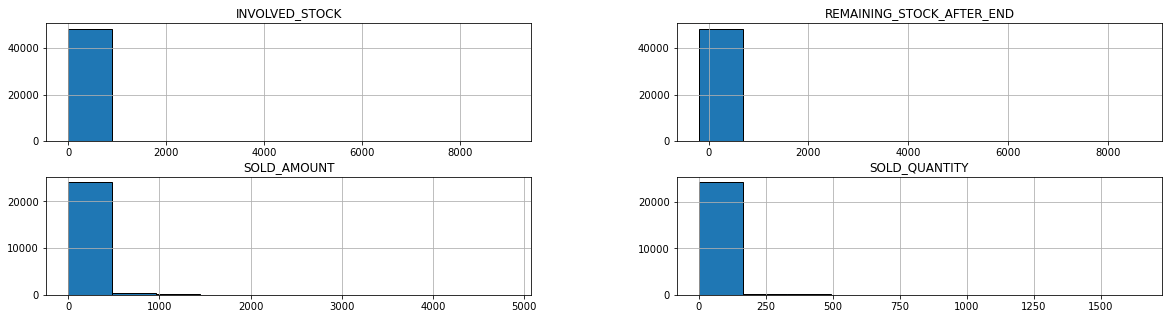

In [6]:
# se seleccionan las columnas de las variables numéricas
var_num =np.array(df_2.select_dtypes(['int64', 'float']).columns)

var_num = list(var_num)
var_num = [i for i in var_num]
print('Valores faltantes por variable numérica:', '\n')
print(df[var_num].isna().sum())
print('---'*50)
df_2[var_num].hist(ec='black', figsize=(20,5));

Se observa que para las variables numéricas 'INVOLVED_STOCK' y 'REMAINING_STOCK_AFTER_END' no se presenta valores faltantes. Sin embargo, las variables numéricas 'SOLD_AMOUNT' y 'SOLD_QUANTITY' tienen aprox 50% de valores faltantes que validando en la mayoria de los casos se debe a una igual entre el valor de 'INVOLVED_STOCK' y 'REMAINING_STOCK_AFTER_END'. Por otro lado, se observa un gran sesgo en su distribución, esto puede significar que los valores en estas variables tienden a concentrarse en un rango puntual.Esto se compara contra la variable 'DOM_DOMAIN_AGG1'.

<ipython-input-10-6486e06ddca4>:27: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


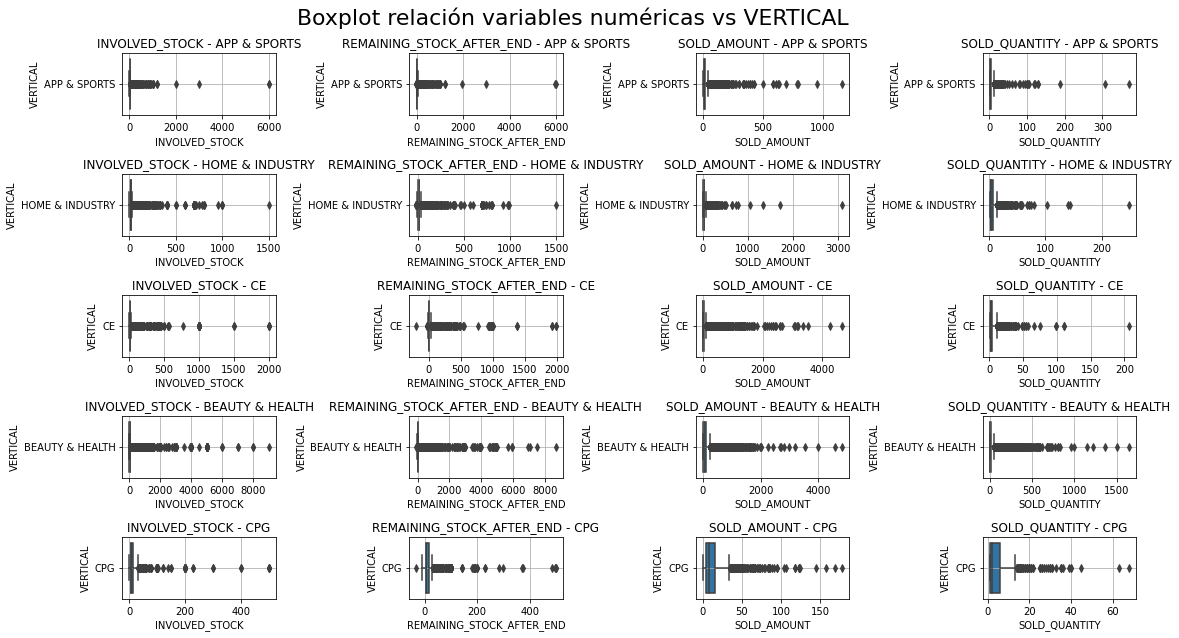

In [10]:
# Obtener las 5 categorías con mayor frecuencia en 'readmitted'
vertical_counts = Counter(df_2['VERTICAL'])
top_5_vertical = vertical_counts.most_common(5)
top_5_vertical = [category[0] for category in top_5_vertical]

r = list(var_num)
r.append('VERTICAL')

r = [column for column in r if column in df_2.columns and df_2[column].dtype != object]

# Gráfica boxplot por categoría
fig, ax = plt.subplots(nrows=len(top_5_vertical), ncols=len(r), figsize=(16,9), constrained_layout=True)
plt.suptitle('Boxplot relación variables numéricas vs VERTICAL', fontsize=22)

o = 0
for i, vertical_category in enumerate(top_5_vertical):
    for j, column in enumerate(r):
        try:
            sb.boxplot(data=df_2[df_2['VERTICAL'] == vertical_category], x=column, y='VERTICAL', ax=ax[i, j])
            ax[i, j].set_title(f"{column} - {vertical_category}")
            ax[i, j].grid(True)
            o += 1
        except:
            pass;

# Ajustar espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Se puede observar que 

### 1.2. Análisis variables categóricas

In [20]:
df_2['OFFER_START_DATE'] = pd.to_datetime(df_2['OFFER_START_DATE'])
df_2['OFFER_START_DTTM'] = pd.to_datetime(df_2['OFFER_START_DTTM'])
df_2['OFFER_FINISH_DTTM'] = pd.to_datetime(df_2['OFFER_FINISH_DTTM'])

In [21]:
var_cat = list(np.array(df_2.select_dtypes(['object']).columns))

print('Variables categóricas con faltantes:', '\n')
print(df_2[var_cat].isna().sum().sort_values(ascending=False).head(6), '\n')
print('---'*50)
print('Valores únicos por variable categórica:', '\n')
df_2[var_cat].nunique().sort_values(ascending=False).head(6)

Variables categóricas con faltantes: 

ORIGIN                   37430
OFFER_TYPE                   0
SHIPPING_PAYMENT_TYPE        0
DOM_DOMAIN_AGG1              0
VERTICAL                     0
DOMAIN_ID                    0
dtype: int64 

------------------------------------------------------------------------------------------------------------------------------------------------------
Valores únicos por variable categórica: 



DOMAIN_ID                1266
DOM_DOMAIN_AGG1            36
VERTICAL                    9
SHIPPING_PAYMENT_TYPE       2
OFFER_TYPE                  1
ORIGIN                      1
dtype: int64

Se observa que las variables 'ORIGIN' presenta la mayor cantidad de registros faltantes. Al tener un número tan elevado, se considera No tener encuenta esta variable. Por otro lado, la gran mayoria de las variables categóricas tiene hasta 9 categorías. Las variables 'OFFER_START_DATE','OFFER_START_DTTM', 'OFFER_FINISH_DTTM' y 'DOMAIN_ID' presentan muchas categorias (>61), sin embargo al revisar la data las tres primeras corresponden a fecha por lo que no resulta extraño este valor tan alto y la ultima corresponde a una desagregación mayor de la variable 'DOM_DOMAIN_AGG1' por lo anterior estas no seran tenidad en cuenta en el analisis. Para encontrar una relación entre las variables categóricas y la variable 'VERTICAL' (también categórica), se muestran las tablas de contingencia.

In [23]:
""" TABLAS DE CONTINGENCIA """

for i in df_2[var_cat].drop('VERTICAL',axis=1).columns:
    print(pd.crosstab(df_2['VERTICAL'], df_2[i]))
    print('--'*80)

OFFER_TYPE       lightning_deal
VERTICAL                       
ACC                        2573
APP & SPORTS              13241
BEAUTY & HEALTH            7150
CE                         8629
CPG                        2714
ENTERTAINMENT               525
HOME & INDUSTRY           11011
OTHERS                      279
T & B                      2624
----------------------------------------------------------------------------------------------------------------------------------------------------------------
ORIGIN              A
VERTICAL             
ACC               231
APP & SPORTS     2124
BEAUTY & HEALTH  2393
CE               1892
CPG               934
ENTERTAINMENT     117
HOME & INDUSTRY  2436
OTHERS             75
T & B            1114
----------------------------------------------------------------------------------------------------------------------------------------------------------------
SHIPPING_PAYMENT_TYPE  free_shipping  none
VERTICAL                                 

Se observa que las variables 